## Deteccion de Peces usando YOLOv3

### Montando el drive para obtencion de directorios y dataset

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!ln -s "/gdrive/MyDrive/DesarrolloAppsConVisionArtificial/proyectoVisionArtificial" /driveVA

In [ ]:
!ls /driveVA

 backupsTrainYolo   predictions.jpg
 darknet	    Presentación.gslides
 noaadataset	   'Propuesta de Proyecto de Visión Artificial.gdoc'
 notebooks	    videFish.avi


In [ ]:
pathTrainValid =  '/driveVA/noaadataset/training_and_validation/'

### Cargando Datos

In [ ]:
import pandas as pd
import numpy as np
pathTrainValidData = pathTrainValid + 'Positive_fish_(ALL)-MARKS_DATA.info'
dataFishWithLabel = pd.read_csv(pathTrainValidData)

In [ ]:
#dataFishWithLabel.head()
dataFishWithLabel['Filename'] = dataFishWithLabel['Filename'].str.slice(start=70)
dataFishWithLabel.head(10)

,Filename,TimerTick,FrameCount,VideoHeight,VideoWidth,TotalFrames,RectX,RectY,RectWidth,RectHeight,Species
0,DSCN0937.TIF,0,0,1536,2048,0,485,466,1308,403,
1,DSCN0938.TIF,0,0,1536,2048,0,554,659,743,710,
2,DSCN0939.TIF,0,0,1536,2048,0,552,371,582,826,
3,DSCN0945.TIF,0,0,1536,2048,0,638,270,759,1245,
4,DSCN0946.TIF,0,0,1536,2048,0,585,361,736,524,
5,DSCN0948.TIF,0,0,1536,2048,0,885,792,233,359,
6,DSCN0954.TIF,0,0,1536,2048,0,201,815,1403,543,
7,DSCN0955.TIF,0,0,1536,2048,0,608,626,677,431,
8,DSCN0957.TIF,0,0,1536,2048,0,105,308,1022,489,
9,DSCN0967.TIF,0,0,1536,2048,0,535,238,849,742,


In [ ]:
dataFishWithLabel.shape

(1005, 11)

### Creacion de Labels a partir de dataFishWithLabels

In [ ]:
def convertPosPercentage(sizeImg, bb):
  xmin = bb[0]
  xmax = xmin + bb[2]
  ymin = bb[1]
  ymax = ymin + bb[3]
  sizeX = sizeImg[1] #ancho
  sizeY = sizeImg[0] #altura
  #factores para la probabilidad con el tamanio total de la imagen
  dw = 1/sizeX
  dh = 1/sizeY
  #capturando el centro del bounding box
  x = (xmin + xmax)/2.0
  y = (ymin + ymax)/2.0
  #ancho y altura del bounding box
  w = (xmax -xmin)
  h = (ymax -ymin)
  #calculando centro y dimensiones del bb con probabilidad (0..1)
  new_x = x * dw
  new_w = w * dw
  new_y = y * dh
  new_h = h * dh

  return [new_x,new_y,new_w,new_h]
  


In [ ]:
import os
from os.path import join, isfile
from os import getcwd, listdir


In [ ]:
### EJECUTARLO 2 VECES

import os
from os.path import join, isfile
from os import getcwd, listdir



#Crear el directorio de labels
if not os.path.exists(pathTrainValid+'labels_v2/'):
  os.makedirs(pathTrainValid+'labels_v2/')

path = dataFishWithLabel.iloc[0,0]
pathAnt = path[:-4]
colIni = 6
contFirst = 0
#out_file = open('labels/%s.txt'%(pathAnt),'w')
out_file = open(pathTrainValid+'labels_v2/%s.txt'%(pathAnt),'w')

for i in range(len(dataFishWithLabel)): 
  #obtenemos los datos de la ruta solo el id
  path = dataFishWithLabel.iloc[i,0]
  path = path[:-4]

  #obtener las posiciones de inicio y final (xmin,ymin,xmax,ymax)
  temPosicion = convertPosPercentage(dataFishWithLabel.iloc[i,3:5],dataFishWithLabel.iloc[i,6:10])

  #quitando la ruta y solo considerar el id de la imagen
  #pathTemp = path[70:-4] 

  if (path != pathAnt):
    out_file.close() #cerrando el ultimo outfile
    out_file = open(pathTrainValid+'labels_v2/%s.txt'%(path),'w')
    pathAnt = path    
  
  #temPosicion = dataFishWithLabel.iloc[i,colIni:colIni+4]
  out_file.write("0"+" "+" ".join([str(pos) for pos in temPosicion]) + '\n')
  
out_file.close()


In [ ]:
#!rm -r labels

### Limpieza de las imagenes en nombre y formatos y separacion

In [ ]:
#TODO remover los nombre set_0 de los archivos de imagenes
#Esto se hara una sola vez ya que es modificado en el drive
# fnames = [f for f in listdir(pathTrainValid+"Positive_fish/") if (isfile(join(pathTrainValid+"Positive_fish/", f))) and (f[0] == 'S')]

# for fileImg in fnames:
#   src = pathTrainValid+"Positive_fish/" + fileImg
#   newname = fileImg[5:] #borramos el set
#   dst = pathTrainValid+"Positive_fish/" + newname
#   os.rename(src,dst)

In [ ]:
#!rm -r /driveVA/noaadataset/training_and_validation/Positive_fish/*.txt

In [ ]:
#Convirtiendo DSCN0937.JPG_0.jpg a DSCN0937.jpg  y DSCN0937.TIF_0.jpg a DSCN0937.jpg 
# fnames = [f for f in listdir(pathTrainValid+"JPEGImages/") if (isfile(join(pathTrainValid+"JPEGImages/", f))) and (f[-10:-4] == '.TIF_0') and (f[-10:-4] == '.JPG_0')]

# for fileImg in fnames:
#   src = pathTrainValid+"JPEGImages/" + fileImg
#   newname = fileImg[:-10]+'.jpg' #borramos el set
#   dst = pathTrainValid+"JPEGImages/" + newname
#   os.rename(src,dst)

In [ ]:
#Algunas imagenes poseia .JPG en mayuscula y otra .jpg en minuscula todas se hicieron en .jpg minuscula
# fnames = [f for f in listdir(pathTrainValid+"JPEGImages/") if isfile(join(pathTrainValid+"JPEGImages/", f))]

# for fileImg in fnames:
#   src = pathTrainValid+"JPEGImages/" + fileImg
#   newname = fileImg.split('.')[0]
#   dst = pathTrainValid+"JPEGImages/" + newname + ".jpg"
#   os.rename(src,dst)

In [ ]:
#Cambiar el nombre de Positive_fish a JPEGImages
#!mv /driveVA/noaadataset/training_and_validation/Positive_fish/ /driveVA/noaadataset/training_and_validation/JPEGImages 

In [ ]:
#Buscar conincidencia y separar las imagenes negativas de las imagenes que poseen peces
# if not os.path.exists(pathTrainValid+'JPEGImages_v2/'):
#   os.makedirs(pathTrainValid+'JPEGImages_v2/')

# #Concidiencia de archivos 
# fimages = [f for f in listdir(pathTrainValid+"JPEGImages/") if isfile(join(pathTrainValid+"JPEGImages/", f)) ]
# flabels = [f for f in listdir(pathTrainValid+"labels/") if isfile(join(pathTrainValid+"labels/", f)) ]

# get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]

# for flab in flabels:
#   #print(flab[:-4])
#   idBusq = get_indexes(flab[:-4]+".jpg",fimages)[0]
#   src = pathTrainValid+"JPEGImages/" + fimages[idBusq]
#   dst = pathTrainValid+"JPEGImages_v2/"+ fimages[idBusq]
#   os.rename(src,dst)

In [ ]:
list_labels = sum(len(files) for _, _, files in os.walk(pathTrainValid+"labels_v2/"))
list_images = sum(len(files) for _, _, files in os.walk(pathTrainValid+"JPEGImages_v2/"))
print("Nro de Imagenes: %s"%list_images)
print("Nro de Etiquetas: %s"%list_labels)
#sin considerar lo que esta en el directorio vec (no es recursivo)
#y sin considerar el archivo 59DSCN2572_C.jpg que no figura en la lista total (1327)

Nro de Imagenes: 575
Nro de Etiquetas: 575


### Mostrando Imagen sin anotaciones solo visualizar

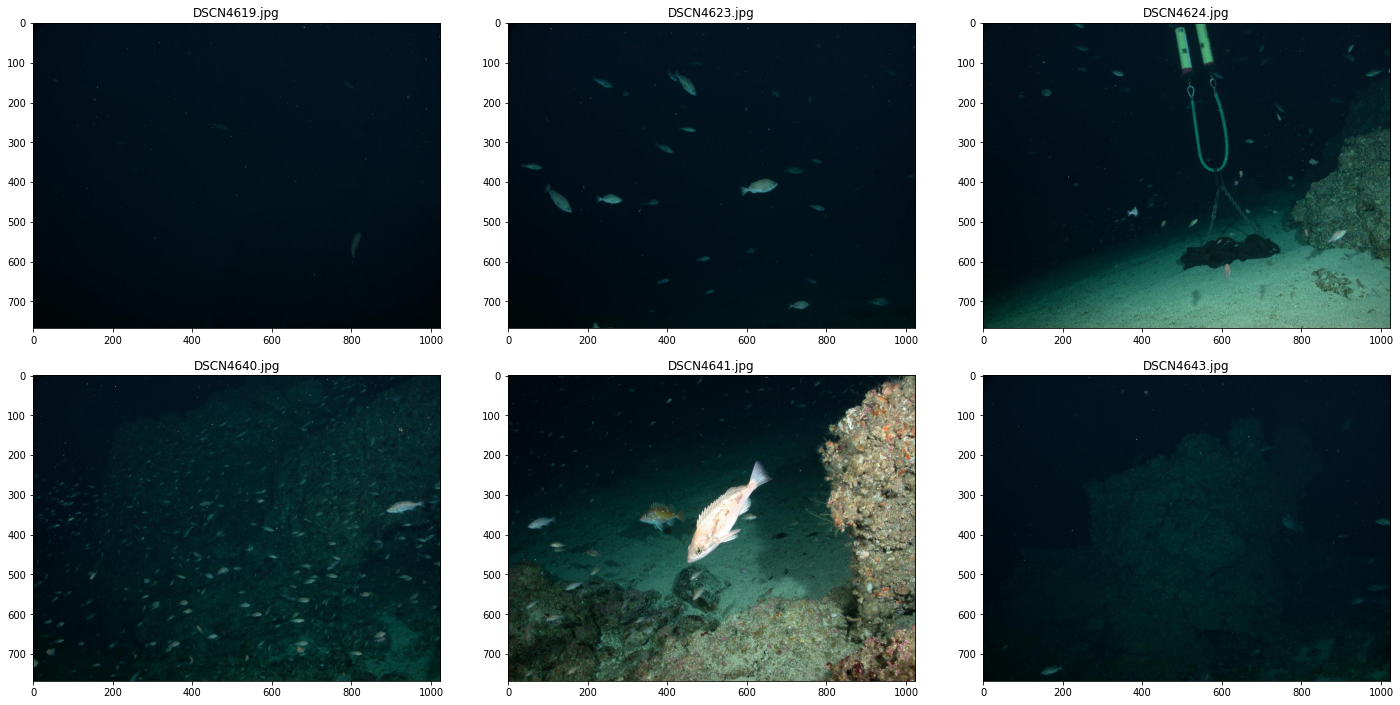

In [ ]:
#Mostrando un subcojunto pequenio de imagenes
import matplotlib.pyplot as plt
from PIL import Image


numRowsPlot = 2
numImagInCol = 3
fnames = [f for f in listdir(pathTrainValid+"JPEGImages_v2/") if isfile(join(pathTrainValid+"JPEGImages_v2/", f))]
fnames_lim = fnames[:numRowsPlot*numImagInCol ]

fig, axs = plt.subplots(numRowsPlot, numImagInCol , figsize=(20, 10))

posIni = 0
posFin = numImagInCol 
for axg in axs:
  fname_temp = fnames_lim[posIni:posFin]
  for ax, fileImg in zip(axg,fname_temp): 
    img = Image.open(join(pathTrainValid+"JPEGImages_v2/", fileImg))
    ax.imshow(img)
    ax.set_title(fileImg)
  posIni += numImagInCol
  posFin += numImagInCol

fig.tight_layout(pad=1.5)

### Mostrando Imagen con su respectiva anotacion

In [ ]:
def deConversion(posBb, imgSize):
  #factor de la imagen
  ndw = imgSize[0]
  ndh = imgSize[1]
  #centro y size del bb sin probabilidad
  new_x = float(posBb[0])*ndw
  new_y = float(posBb[1])*ndh
  
  new_w = float(posBb[2])*ndw
  new_h = float(posBb[3])*ndh

  #teniendo el centro restamos la mitad del ancho y del alto
  #sera la nueva posicion xmin, ymin
  nxmin = new_x - new_w/2.0
  nymin = new_y - new_h/2.0

  return [nxmin,nymin,new_w,new_h]



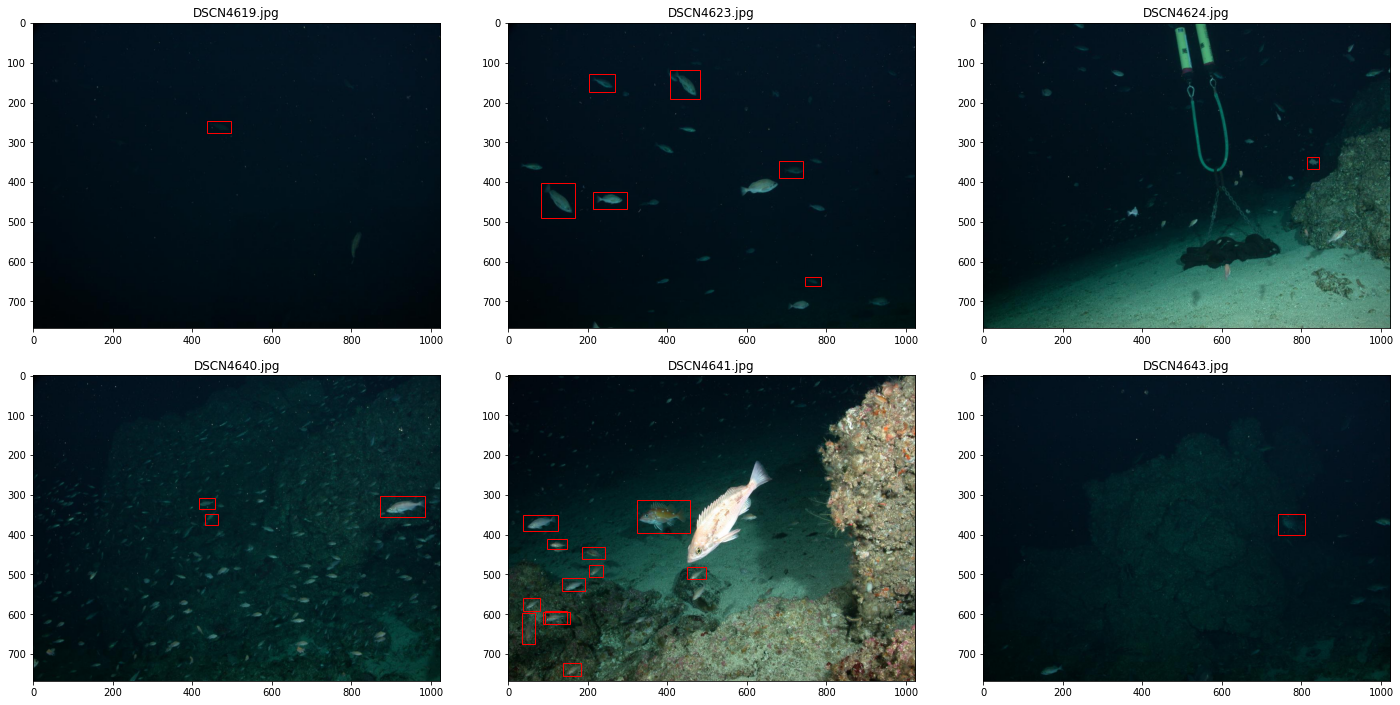

In [ ]:
#Mostrando un subcojunto pequenio de imagenes
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image


numRowsPlot = 2
numImagInCol = 3
fnames = [f for f in listdir(pathTrainValid+"JPEGImages_v2/") if isfile(join(pathTrainValid+"JPEGImages_v2/", f))]
fnames_lim = fnames[:numRowsPlot*numImagInCol ]

fig, axs = plt.subplots(numRowsPlot, numImagInCol , figsize=(20, 10))

posIni = 0
posFin = numImagInCol 
for axg in axs:
  fname_temp = fnames_lim[posIni:posFin]
  for ax, fileImg in zip(axg,fname_temp): 
    img = Image.open(join(pathTrainValid+"JPEGImages_v2/", fileImg))
    strLabFile = fileImg[:-4]+".txt"
    labFile = open(join(pathTrainValid+"labels_v2/",strLabFile), "r")
    #recorremos las etiquetas del archivo de anotaciones
    for labTemp in labFile:
      posBb = deConversion(labTemp.split(' ')[1:],img.size)
      rect = patches.Rectangle((posBb[0],posBb[1]),posBb[2],posBb[3],linewidth=1,edgecolor='r',facecolor='none')
      ax.add_patch(rect)
    ax.imshow(img)
    ax.set_title(fileImg)
  posIni += numImagInCol
  posFin += numImagInCol

fig.tight_layout(pad=1.5)

### Separar el dataset en training y test(validation)

In [ ]:
import random
import os
import subprocess
import sys

#creamos archivos para train y test respectivamente
f_vall = open("noaa_test.txt",'a')
f_train = open("noaa_train.txt",'a')

#ruta absoluta para ver la cantidad de archivos
path, dirs, files = next(os.walk(pathTrainValid+"JPEGImages_v2"))
data_size = len(files)

ind = 0
#dividir entre 10 y truncar
data_test_size = int(0.1 * data_size)
#tomar k elementos aleatorios de data_size 
test_array = random.sample(range(data_size), k=data_test_size)
#recorremos los directorios
for f in os.listdir(pathTrainValid+"JPEGImages_v2"):
  #verificamos si es una imagen tipo jpg
  if (f.split(".")[1] == "jpg"):
    ind += 1
    if ind in test_array:
      f_vall.write(pathTrainValid+"JPEGImages_v2"+'/'+f+'\n')
    else:
      f_train.write(pathTrainValid+"JPEGImages_v2"+'/'+f+'\n')
f_vall.close()
f_train.close()

### Entrenando con YOLO v3

In [ ]:
!git clone https://github.com/chiconasa3000/fishDetectionInTheWild.git

Cloning into 'fishDetectionInTheWild'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 1121 (delta 14), reused 20 (delta 9), pack-reused 1095
Receiving objects: 100% (1121/1121), 67.69 MiB | 40.49 MiB/s, done.
Resolving deltas: 100% (242/242), done.


In [ ]:
#%cd ../..
#!rm -r fishDetectionInTheWild
#!make clean
%cd fishDetectionInTheWild/darknet

/content/fishDetectionInTheWild/darknet


In [ ]:
!make

/content/fishDetectionInTheWild/darknet
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv 2> /dev/null || pkg-config --cflags opencv4` -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DOPENCV -DGPU -c ./src/gemm.c -o obj/gemm.o
./src/gemm.c: In function ‘time_gpu’:
./src/gemm.c:232:9: warning: ‘cudaThreadSynchronize’ is deprecated [-Wdeprecated-declarations]
         cudaThreadSynchronize();
         ^~~~~~~~~~~~~~~~~~~~~
In file included from /usr/local/cuda/include/cuda_runtime.h:96:0,
                 from include/darknet.h:11,
                 from ./src/utils.h:5,
                 from ./src/gemm.c:2:
/usr/local/cuda/include/cuda_runtime_api.h:957:57: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                                         ^~~~~~~~~~~~~~~~~~~~~
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cfla

In [ ]:
#!cp darknet /driveVA/darknet/darknetfish
#!cp /driveVA/darknet/darknetFish ./darknetFish
#!chmod 777 ./darknetFish

In [ ]:
#conseguir iniciales pesos
#!wget https://pjreddie.com/media/files/darknet53.conv.74
pesosIniciales = '/driveVA/darknet/darknet53.conv.74'

In [ ]:
f_classFish = open("classesfish.names","w")
f_classFish.write("fish")
f_classFish.close()

In [ ]:
#armando el archivo de datos para la red
f_yoloFishData = open("yoloFish.data",'w')
f_yoloFishData.write("classes = 1\n")
f_yoloFishData.write("train = " + "/content/noaa_train.txt\n")
f_yoloFishData.write("valid = " + "/content/noaa_test.txt\n")
f_yoloFishData.write("names = " + "/content/darknet/classesfish.names\n")
f_yoloFishData.write("backup = " + "/content/darknet/backup/\n")
f_yoloFishData.close()

 #/backup//yolov3-voc-fish.backup

#### Entrenar la *red*

In [ ]:
!./darknet detector train yoloFish.data cfg/yolov3-voc-fish.cfg /driveVA/darknet/darknet53.conv.74
#!./darknet detector train yoloFish.data cfg/yolov3-voc-fish.cfg /driveVA/darknet/darknet53.conv.74 > trainfish.log

yolov3-voc-fish
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32  0.299 BFLOPs
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32  0.177 BFLOPs
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    4 res    1                 208 x 208 x  64   ->   208 x 208 x  64
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    8 res    5                 104 x 104 x 128   ->   104 x 104 x 128
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
   11 res    8       

In [ ]:
#Tomando solo los 300 iteraciones
!grep avg /driveVA/noaadataset/train_Red.log

1: 1645.304199, 1645.304199 avg, 0.000000 rate, 10.042507 seconds, 64 images
2: 1642.311890, 1645.005005 avg, 0.000000 rate, 9.831839 seconds, 128 images
3: 1644.550293, 1644.959473 avg, 0.000000 rate, 9.824191 seconds, 192 images
4: 1650.826172, 1645.546143 avg, 0.000000 rate, 9.892212 seconds, 256 images
5: 1648.148682, 1645.806396 avg, 0.000000 rate, 9.871694 seconds, 320 images
6: 1644.464600, 1645.672241 avg, 0.000000 rate, 9.880011 seconds, 384 images
7: 1646.560303, 1645.760986 avg, 0.000000 rate, 9.905071 seconds, 448 images
8: 1644.319458, 1645.616821 avg, 0.000000 rate, 9.890694 seconds, 512 images
9: 1647.277954, 1645.782959 avg, 0.000000 rate, 9.931551 seconds, 576 images
10: 1646.938354, 1645.898438 avg, 0.000000 rate, 9.949187 seconds, 640 images
11: 1458.754272, 1627.184082 avg, 0.000000 rate, 8.329226 seconds, 704 images
12: 1458.253418, 1610.291016 avg, 0.000000 rate, 8.403439 seconds, 768 images
13: 1461.968262, 1595.458740 avg, 0.000000 rate, 8.365995 seconds, 832 im

Training Data


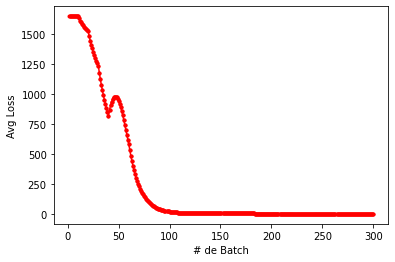

In [ ]:
#### Plot el avg loss despues de guardar el resultado en el archivo train_Red.log
import matplotlib.pyplot as plt

lines = []
for line in open("/driveVA/noaadataset/train_Red.log"):
    if "avg" in line:
        lines.append(line)

iterations = []
avg_loss = []

print('Training Data')
for i in range(len(lines)):
    lineParts = lines[i].split(',')
    iterations.append(int(lineParts[0].split(':')[0]))
    avg_loss.append(float(lineParts[1].split()[0]))

fig = plt.figure()
for i in range(0, len(lines)):
    plt.plot(iterations[i:i+2], avg_loss[i:i+2], 'r.-')

plt.xlabel('# de Batch')
plt.ylabel('Avg Loss')
plt.show()

In [ ]:
#Funcion para mostrar una imagen de predicción
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  #triplicamos el tamanio de la imagen
  resized_image = cv2.resize(image, (3*width, 3*height), interpolation=cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18,10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

### Probando una deteccion usando una imagen del dataset

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32  0.299 BFLOPs
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32  0.177 BFLOPs
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    4 res    1                 208 x 208 x  64   ->   208 x 208 x  64
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    8 res    5                 104 x 104 x 128   ->   104 x 104 x 128
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
   11 res    8                 104 x 

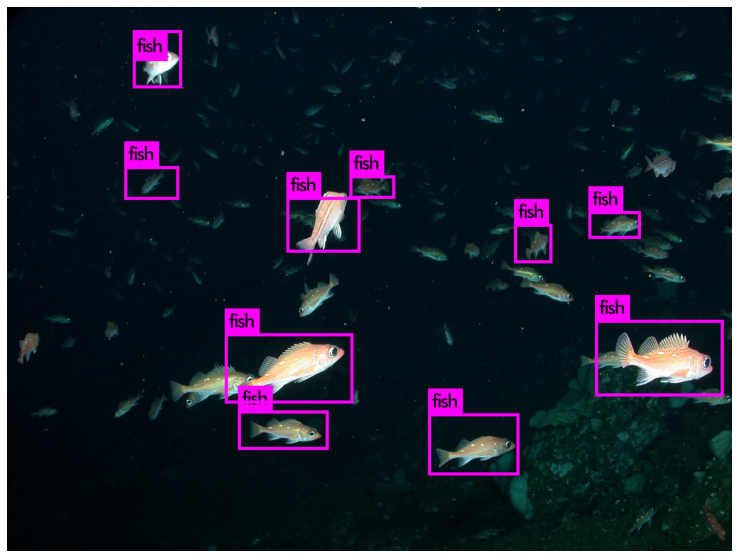

In [ ]:
!./darknet detect /driveVA/darknet/cfg/yolov3-voc-fish.cfg  /driveVA/backupsTrainYolo/yolov3_fish_final.weights /driveVA/noaadataset/training_and_validation/JPEGImages_v2/DSCN2769.jpg
imShow("predictions.jpg")

#### Probando con el video de test

In [ ]:
!pip install imutils pafy youtube-dl

In [ ]:
##Descargando video
from __future__ import unicode_literals
import youtube_dl

ydl_opts = {}
with youtube_dl.YoutubeDL(ydl_opts) as ydl:
    ydl.download(['https://www.youtube.com/watch?v=VXXEuazupoM&t=4s'])

[youtube] VXXEuazupoM: Downloading webpage
[youtube] VXXEuazupoM: Downloading MPD manifest
[dashsegments] Total fragments: 34
[download] Destination: Test ROV video h264 full-VXXEuazupoM.f136.mp4
[download] 100% of 27.08MiB in 00:23
[dashsegments] Total fragments: 19
[download] Destination: Test ROV video h264 full-VXXEuazupoM.f140.m4a
[download] 100% of 2.66MiB in 00:08
[ffmpeg] Merging formats into "Test ROV video h264 full-VXXEuazupoM.mp4"
Deleting original file Test ROV video h264 full-VXXEuazupoM.f136.mp4 (pass -k to keep)
Deleting original file Test ROV video h264 full-VXXEuazupoM.f140.m4a (pass -k to keep)


In [ ]:
# import shutil
# shutil.move("/content/darknet/Test ROV video h264 full-VXXEuazupoM.mp4", "/driveVA/")
!mkdir /driveVA/framesvideos

'/driveVA/Test ROV video h264 full-VXXEuazupoM.mp4'

### Generar frames a partir del video

In [ ]:
import cv2
from skimage.color import rgb2gray
from skimage.transform import resize
import matplotlib.pyplot as plt
import math
import imutils
import pafy

OUTPUT_FRAMES_PATH = '/driveVA/framesvideos'      # Location of extracted images
frame_name = 'frame'                                                  # Frame name       
one_frame_each = 100                                                   # Extract one frame each 70
count = 0
success = True

vidcap = cv2.VideoCapture('/driveVA/Test ROV video h264 full-VXXEuazupoM.mp4')

while success:
    if (count%one_frame_each == 0):                                   # checks frame number and keeps one_frame_each          
        success,image = vidcap.read()                                 # reads next frame           
        #image = rgb2gray(image)
        #print(image_gray.shape)                                 # grayscale image
        if image.shape[1]>640:                                        # if image width > 640, resize it
          tmp = resize(image, (math.floor(640 / image.shape[1] * image.shape[0]), 640),mode='constant')
        plt.imsave("%s/%s%d.png" % (OUTPUT_FRAMES_PATH,frame_name, count), tmp, cmap= plt.cm.viridis) # saves images to frame folder
        print ('*', end="")
    else:
        success,image = vidcap.read()                                 # reads next frame
    count += 1                                                        # loops counter

****************************************************

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32  0.299 BFLOPs
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32  0.177 BFLOPs
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    4 res    1                 208 x 208 x  64   ->   208 x 208 x  64
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    8 res    5                 104 x 104 x 128   ->   104 x 104 x 128
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
   11 res    8                 104 x 

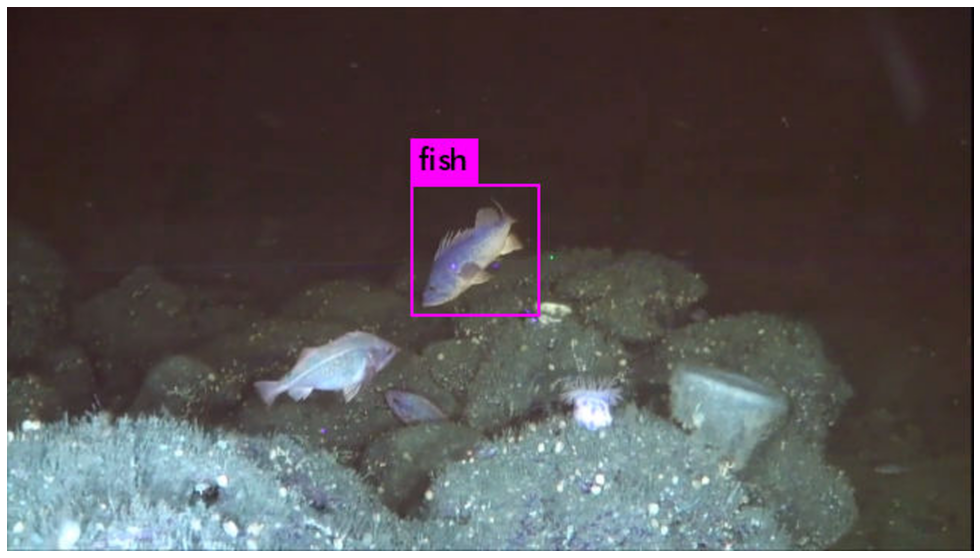

In [ ]:
!./darknet detect /driveVA/darknet/cfg/yolov3-voc-fish.cfg  /driveVA/backupsTrainYolo/yolov3_fish_final.weights /driveVA/noaadataset/videoTestData/framesvideos/frame4200.png
imShow("predictions.jpg")

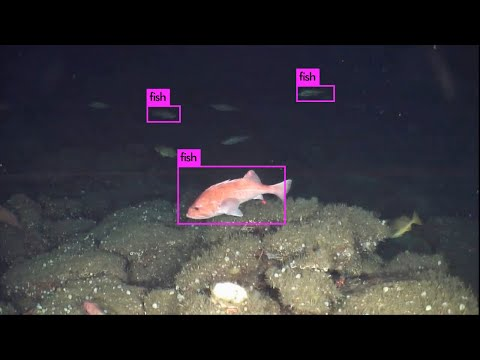

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('J0e2RwvLvY0',width=1024, height=576)